# Trajectory inference on synthetic scRNA-seq data from cellular reprogramming network

We analyse the synthetic scRNA-Seq data generated by scBoolSeq from the Boolean simulations of the cellular reprogramming network in [2.3 - synthetic scRNA-Seq from cellular reprogramming network](2.3%20-%20synthetic%20scRNA-Seq%20from%20cellular%20reprogramming%20network.ipynb).

⚠️ This notebook must be run in a STREAM environment

In [1]:
import pandas as pd
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

#### Read in data

In [3]:
in_file = 'synthetic_data_reprogramming_counts.tsv'

adata = st.read(
    file_name=in_file,
    workdir='./stream_branching'
)
df = pd.read_csv(
    in_file, sep="\t", index_col=0, header=0
)
df

Saving results in: ./stream_branching


,common.0_0,common.1_0,common.2_0,common.3_0,common.4_0,common.5_0,common.6_0,switch_0,branch1.0_0,branch1.1_0,...,common.6_299,switch_299,branch1.0_299,branch1.1_299,branch1.2_299,stable1_299,branch2.0_299,branch2.1_299,branch2.2_299,stable2_299
G1,2.332013,0.983021,1.051408,1.872751,1.469882,1.842518,2.191463,2.726888,2.532718,5.669840,...,2.012113,2.715387,1.653754,8.178878,7.962105,6.614227,1.781937,4.394633,0.714265,3.798878
G2,4.165573,2.765827,1.989230,3.971206,4.325479,2.463216,3.408604,3.335261,3.113929,1.902228,...,4.184479,1.673962,3.425767,1.417074,6.564162,8.259758,2.736619,2.905205,1.976459,0.000000
G3,3.036617,1.046053,2.231362,4.966177,0.199131,1.873473,2.392596,3.079853,1.727244,3.098456,...,2.057285,3.170271,1.694091,3.997272,3.186728,6.124654,1.064837,3.133291,1.115589,2.384117
G4,2.074770,0.505312,0.000000,3.823021,2.072330,1.324959,3.602416,0.795757,0.289076,1.590148,...,0.448112,1.160969,3.232817,2.053166,4.584992,2.015079,0.819506,0.000000,7.004272,7.735472
G5,2.986022,2.334931,3.933310,1.890802,2.122329,2.034974,3.100866,3.116822,2.534054,2.018515,...,2.788002,3.493909,0.771094,4.476590,3.539528,0.086330,2.788833,3.897975,9.462772,9.712304
G6,3.149574,0.517259,0.000000,0.488222,1.321206,2.584524,3.068832,3.893572,4.740555,4.392287,...,2.745285,2.735624,2.152118,1.436913,4.760308,1.262856,2.586831,1.652100,1.227657,6.072910
G7,8.866440,7.515305,9.997864,8.886265,10.573842,9.932584,5.713261,3.607456,3.524567,1.688592,...,8.286901,1.586017,1.374295,2.925640,2.619914,4.279432,2.540313,2.137910,3.331338,3.346911
G8,8.432784,8.184479,6.951664,8.187462,6.925085,2.181608,1.773672,2.477613,3.074818,2.913678,...,5.136095,1.191202,3.747575,3.361277,3.274425,1.567930,3.326951,2.572199,2.024478,3.327301
G9,7.435096,9.757331,5.752679,3.301599,3.149190,1.724121,2.451425,0.903799,2.192013,0.318825,...,1.294759,2.983470,2.350374,3.552211,2.199803,3.742112,1.588584,0.462587,2.664618,2.791129
TF1,3.878601,4.499499,3.678492,5.306327,3.504758,3.883842,2.766272,3.687321,0.000000,8.479916,...,2.654812,2.775523,7.878093,8.962540,7.512333,6.897451,1.497111,0.000000,3.448575,3.537919


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [4]:
adata

AnnData object with n_obs × n_vars = 4800 × 16 
    uns: 'workdir'

#### Read in metadata

In [5]:
st.add_metadata(
    adata, 
    file_name='synthetic_data_reprogramming_metadata.tsv'
)
adata.obs.head()

,label,label_color
common.0_0,common,#aec7e8
common.1_0,common,#aec7e8
common.2_0,common,#aec7e8
common.3_0,common,#aec7e8
common.4_0,common,#aec7e8


In [6]:
adata.obs.label.value_counts()

common     2100
branch2     900
branch1     900
stable1     300
stable2     300
switch      300
Name: label, dtype: int64

#### Calculate QC

In [7]:
st.cal_qc(adata,assay='rna')

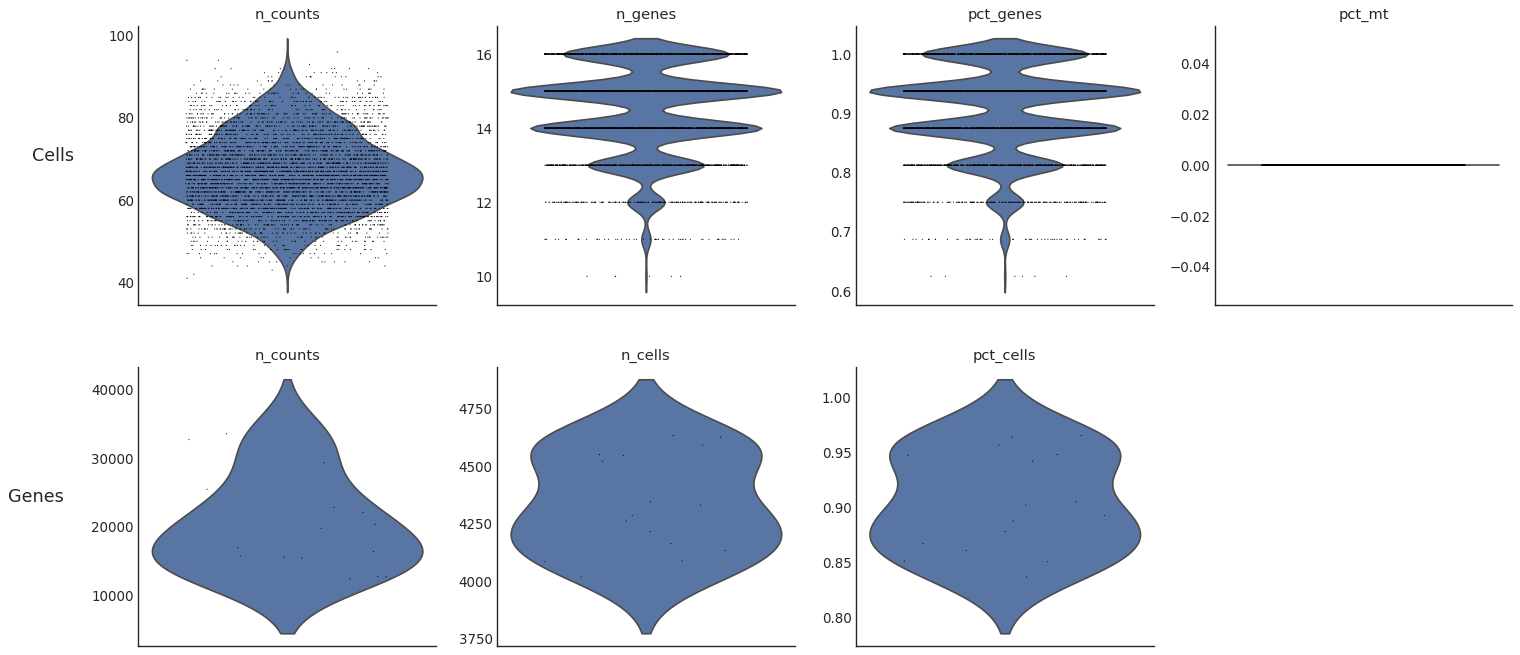

In [8]:
st.plot_qc(adata,jitter=0.3,)

In [9]:
st.filter_cells(adata,min_n_features= 3)
st.filter_features(adata,min_n_cells = 300)

filter cells based on min_n_features
after filtering out low-quality cells: 
4800 cells, 16 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
4800 cells, 16 genes


Commented out because our simulated data is already lib_size normalised and log2 transformed
```python
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
```

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

16 variable genes are selected


Index(['G7', 'TF3', 'G4', 'G9', 'G8', 'TF5', 'G5', 'G1', 'G3', 'TF6', 'G2',
       'G6', 'TF2', 'TF4', 'TF1', 'TF7'],
      dtype='object')

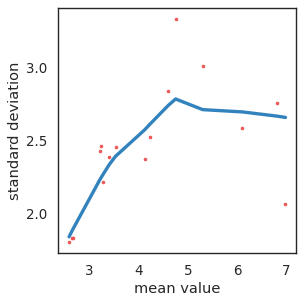

In [10]:
st.select_variable_genes(adata,loess_frac=0.7,n_genes=20)
adata.uns["var_genes"]

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [11]:
st.dimension_reduction(
    adata,
    method='se',
    feature='var_genes',
    n_components=2,
    n_neighbors=15,
    n_jobs=12
)

feature var_genes is being used ...
12 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

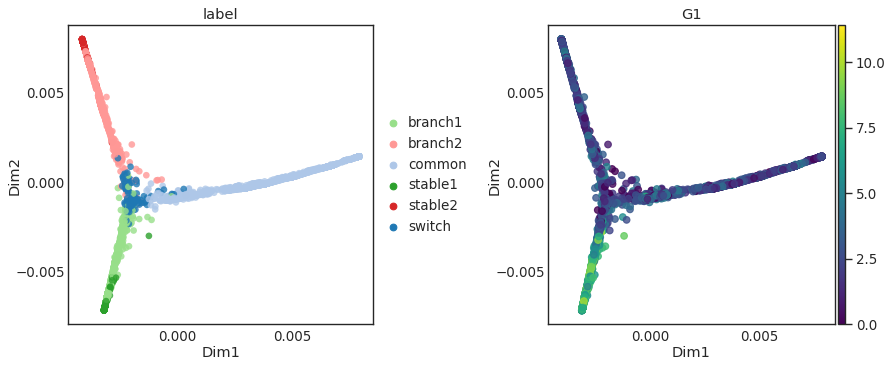

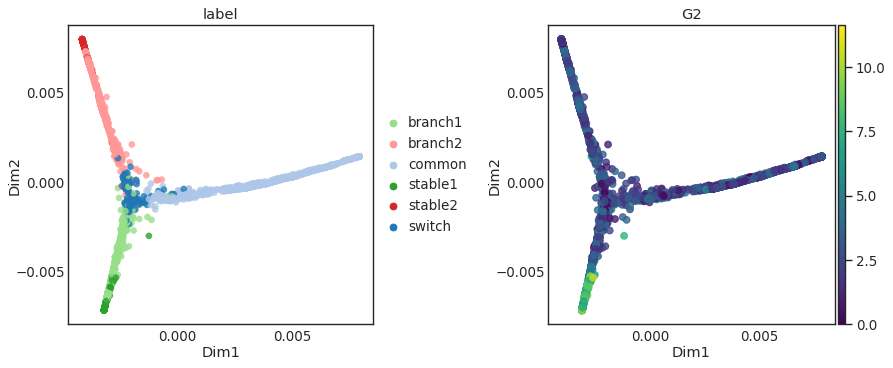

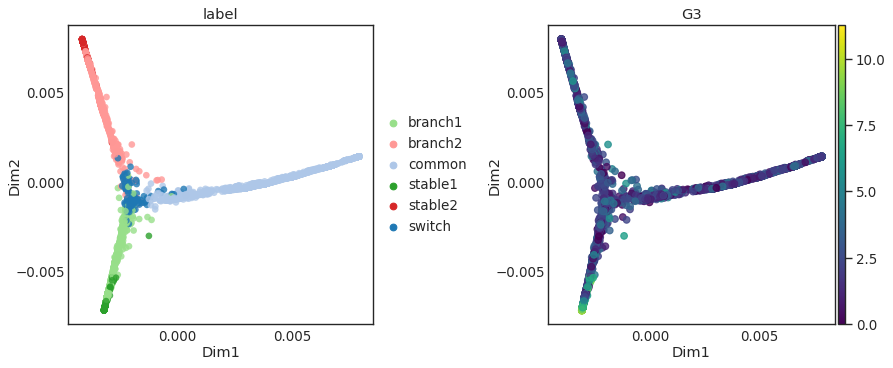

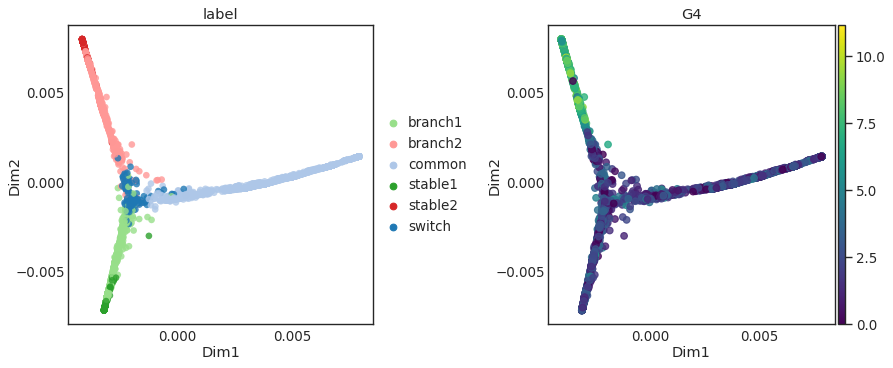

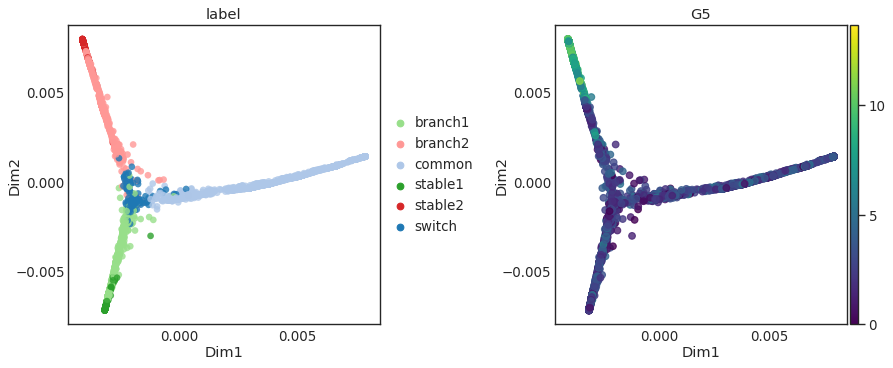

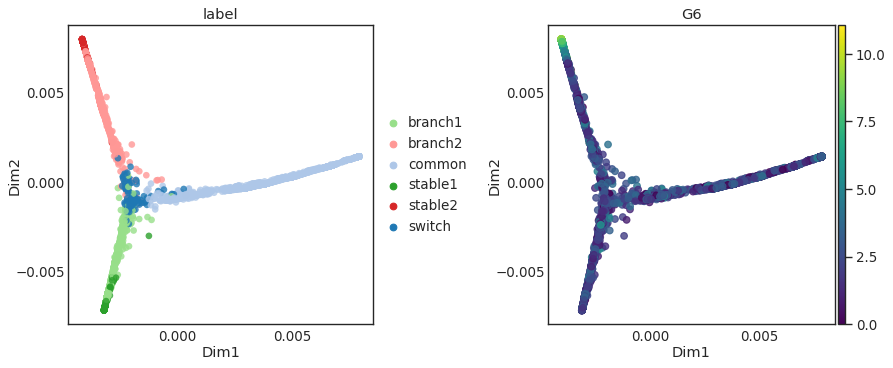

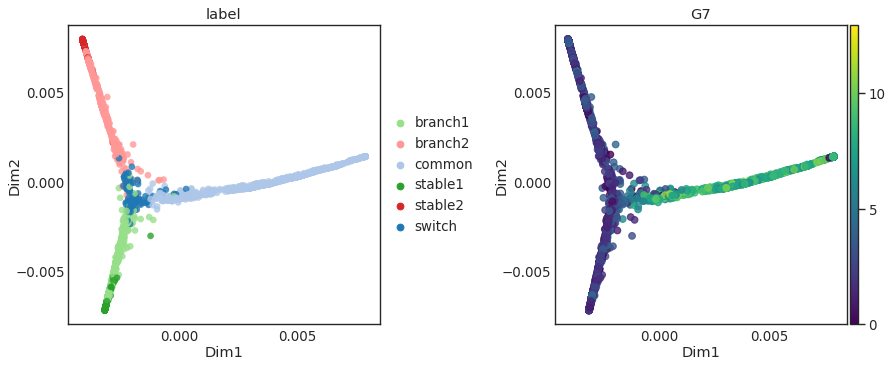

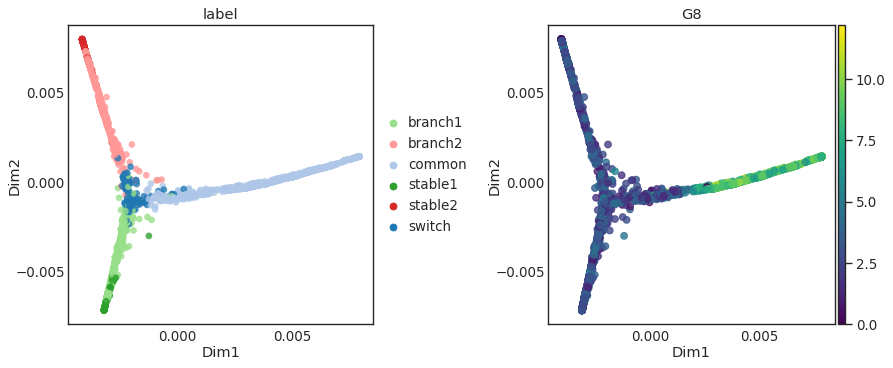

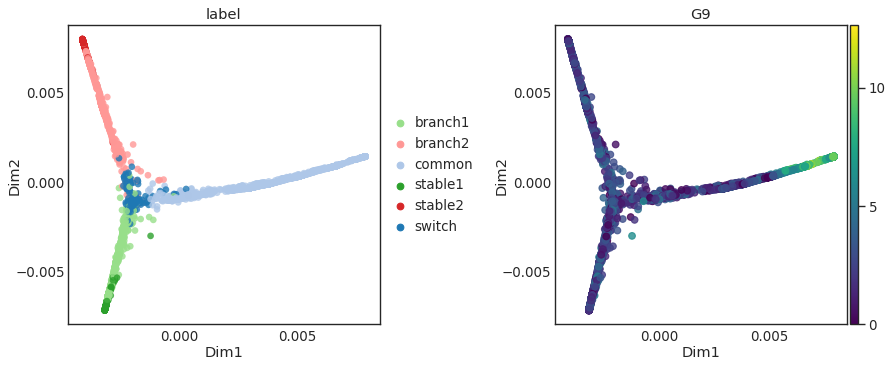

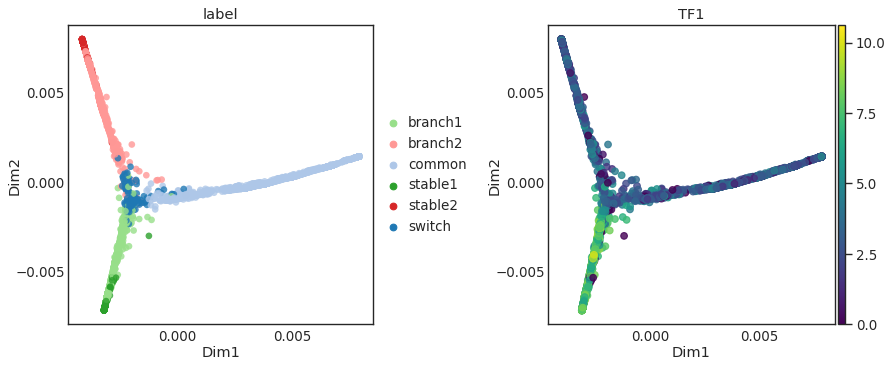

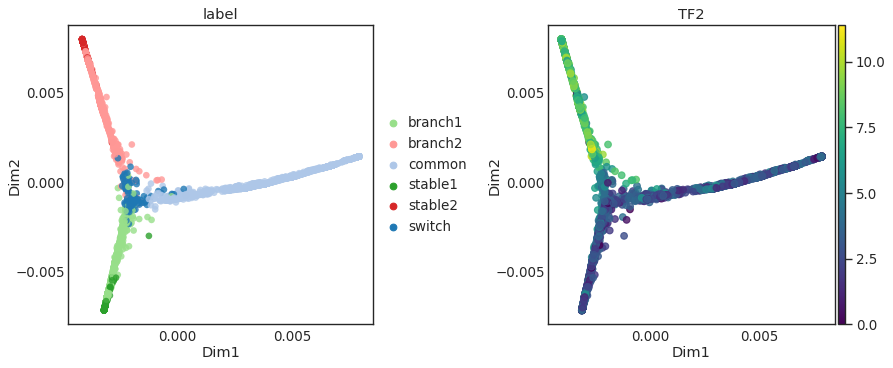

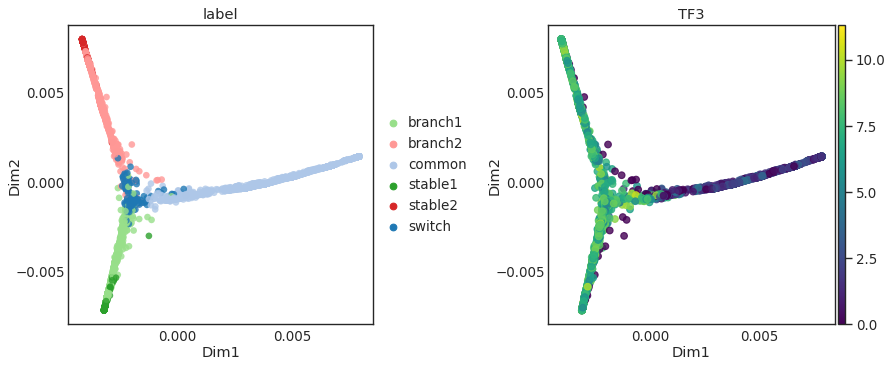

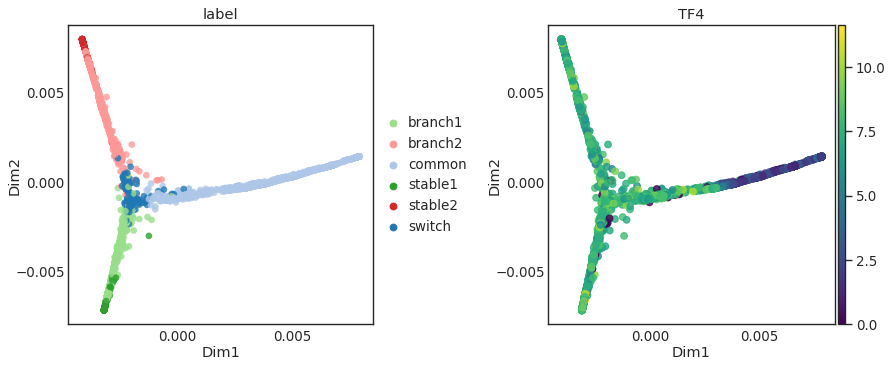

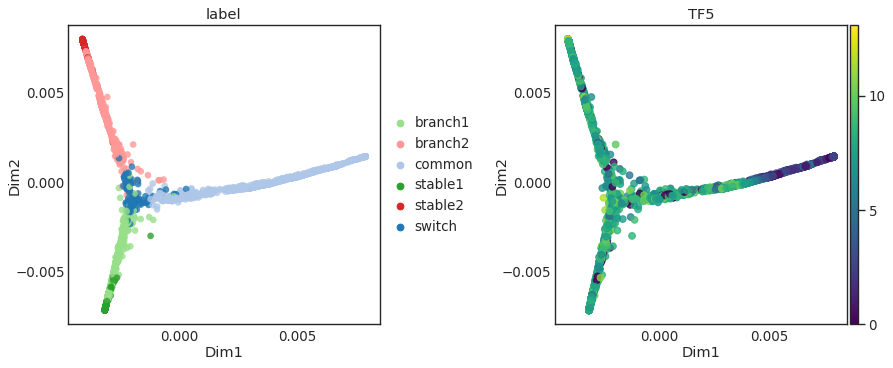

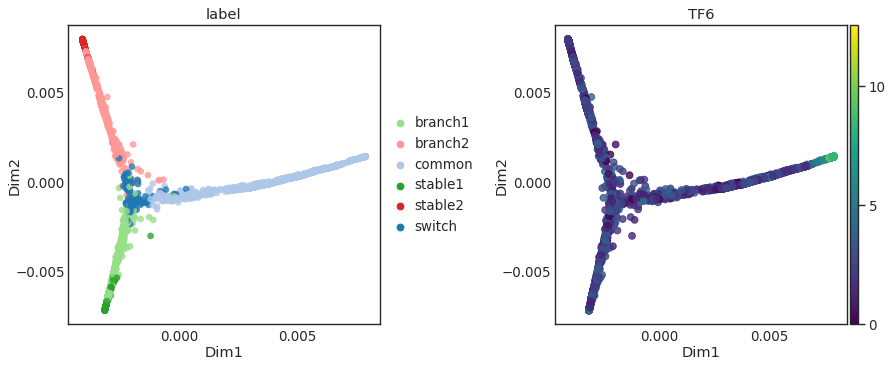

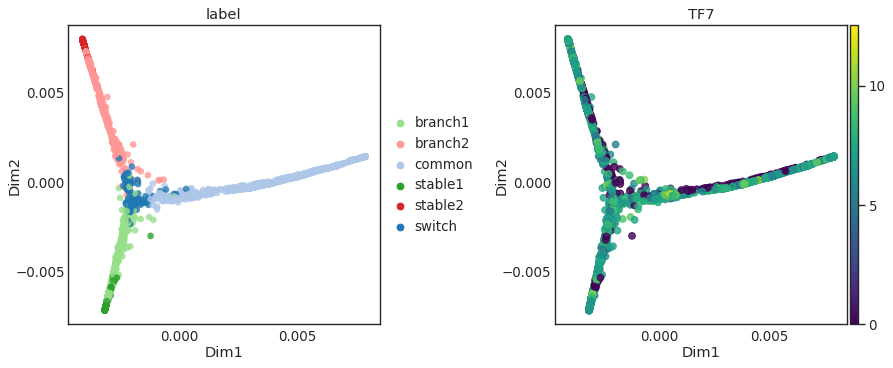

In [12]:
for gene in df.index:
    st.plot_dimension_reduction(adata,color=['label', gene],
                            n_components=2,show_graph=False,show_text=False)

#### Trajectory inference

In [13]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


In [14]:
df.head()

,common.0_0,common.1_0,common.2_0,common.3_0,common.4_0,common.5_0,common.6_0,switch_0,branch1.0_0,branch1.1_0,...,common.6_299,switch_299,branch1.0_299,branch1.1_299,branch1.2_299,stable1_299,branch2.0_299,branch2.1_299,branch2.2_299,stable2_299
G1,2.332013,0.983021,1.051408,1.872751,1.469882,1.842518,2.191463,2.726888,2.532718,5.669840,...,2.012113,2.715387,1.653754,8.178878,7.962105,6.614227,1.781937,4.394633,0.714265,3.798878
G2,4.165573,2.765827,1.989230,3.971206,4.325479,2.463216,3.408604,3.335261,3.113929,1.902228,...,4.184479,1.673962,3.425767,1.417074,6.564162,8.259758,2.736619,2.905205,1.976459,0.000000
G3,3.036617,1.046053,2.231362,4.966177,0.199131,1.873473,2.392596,3.079853,1.727244,3.098456,...,2.057285,3.170271,1.694091,3.997272,3.186728,6.124654,1.064837,3.133291,1.115589,2.384117
G4,2.074770,0.505312,0.000000,3.823021,2.072330,1.324959,3.602416,0.795757,0.289076,1.590148,...,0.448112,1.160969,3.232817,2.053166,4.584992,2.015079,0.819506,0.000000,7.004272,7.735472
G5,2.986022,2.334931,3.933310,1.890802,2.122329,2.034974,3.100866,3.116822,2.534054,2.018515,...,2.788002,3.493909,0.771094,4.476590,3.539528,0.086330,2.788833,3.897975,9.462772,9.712304


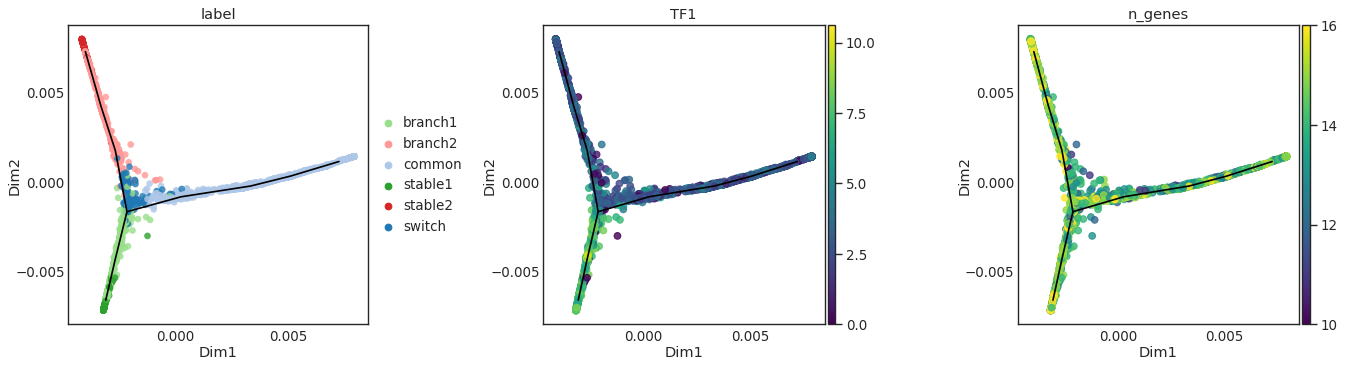

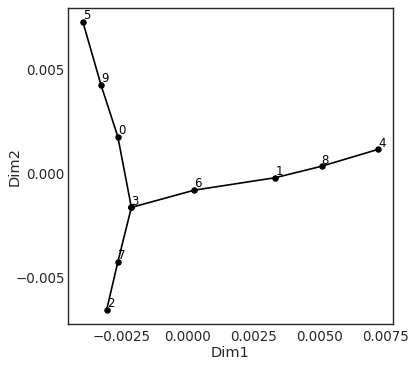

In [15]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [16]:
st.elastic_principal_graph(adata,epg_alpha=0.07,epg_mu=0.07,epg_lambda=0.03)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4800 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
4.53e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
5.535e-08
	
3.801e-08
	
0.9981
	
0.9987
	
3.708e-07
	
2.689e-08
	
1.344e-06
	
6.722e-05
	
0


29.971 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


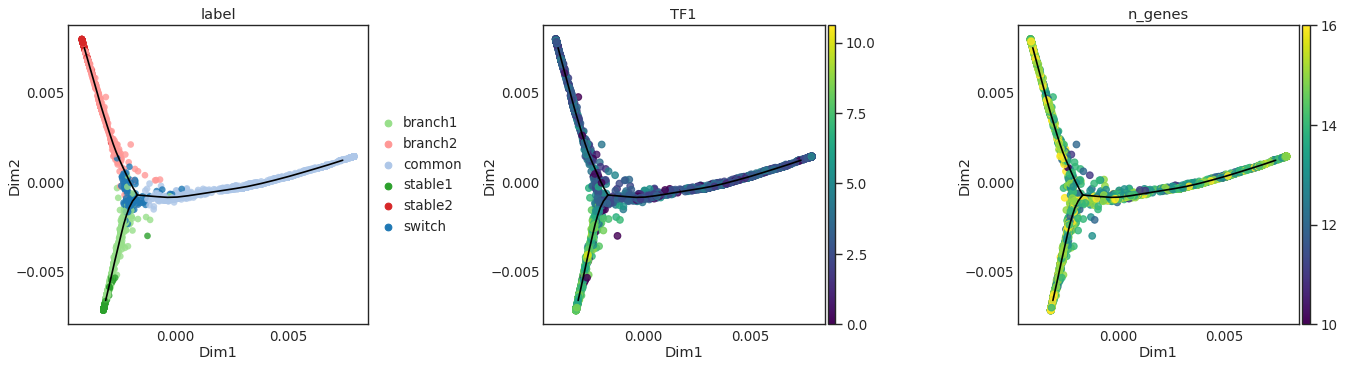

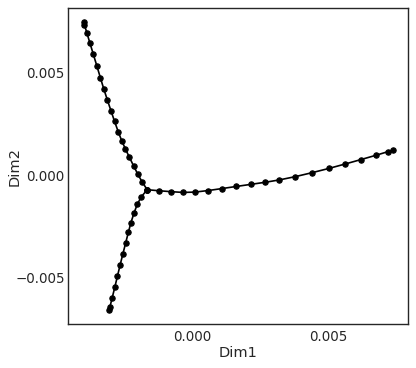

In [17]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


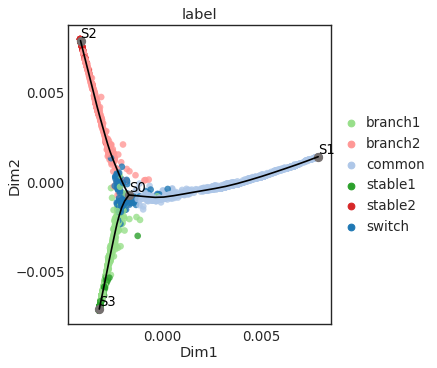

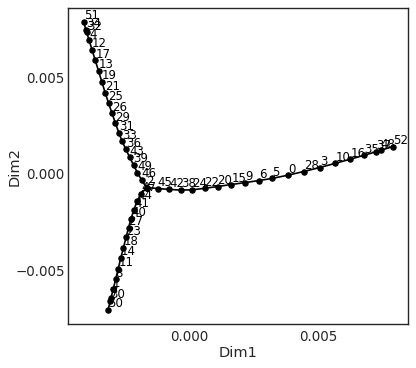

In [18]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

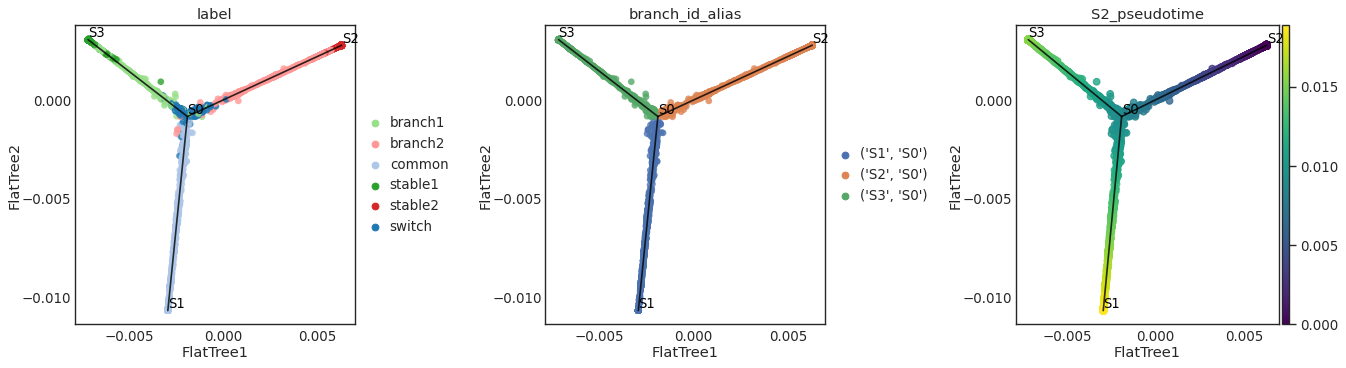

In [19]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

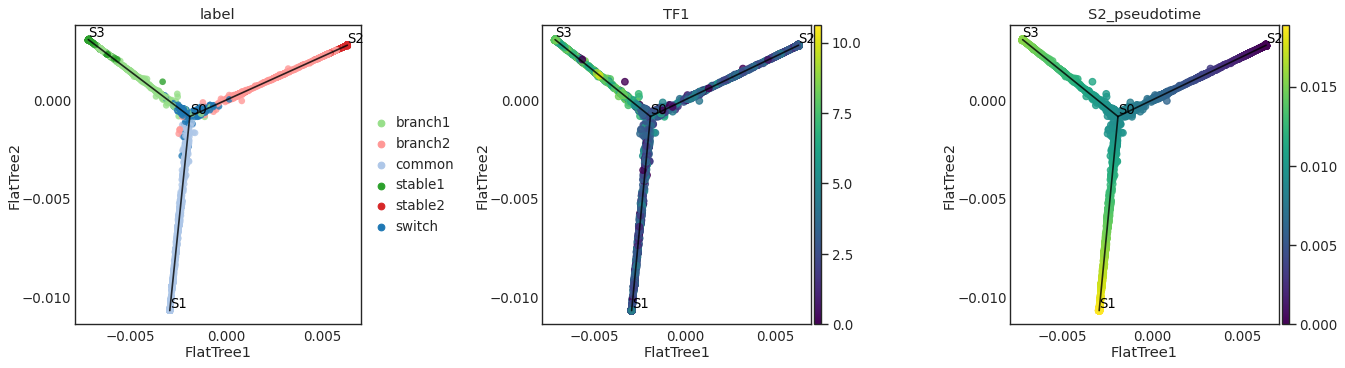

In [20]:
st.plot_flat_tree(adata,color=['label','TF1','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

In [21]:
root = "S1"

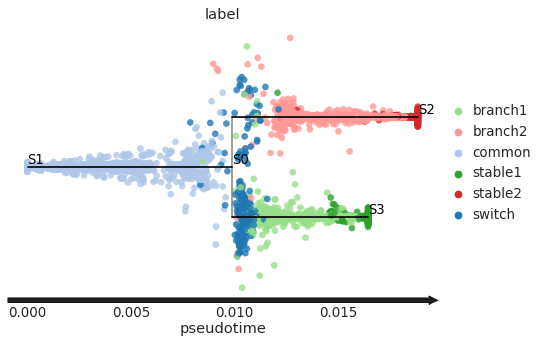

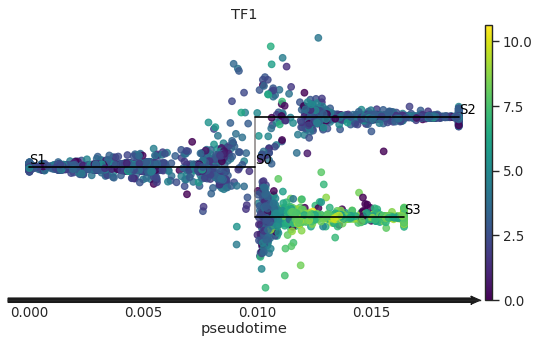

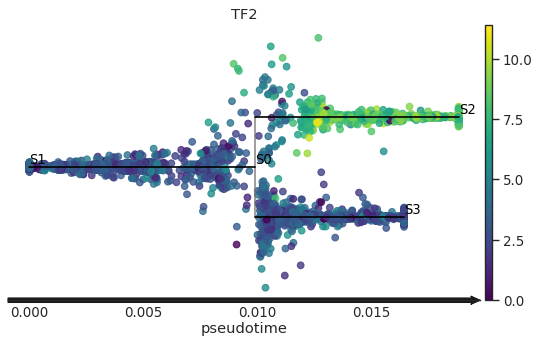

In [22]:
st.plot_stream_sc(adata,root=root,color=['label','TF1', 'TF2'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

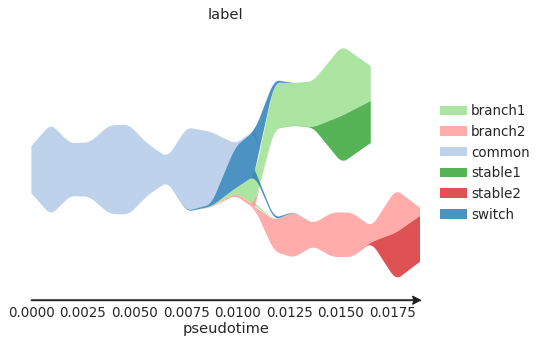

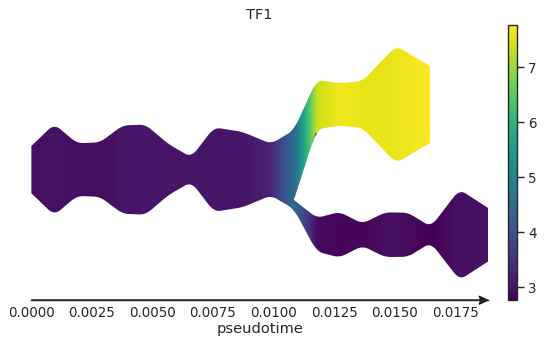

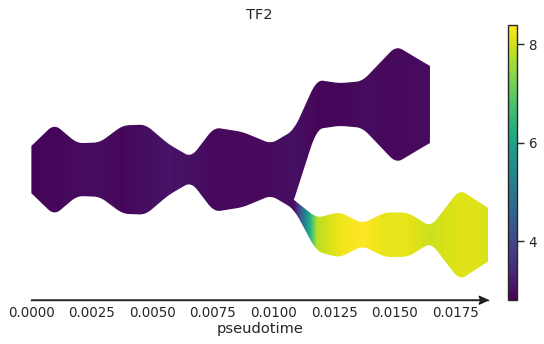

In [24]:
st.plot_stream(adata,root=root,color=['label','TF1', 'TF2'], preference=["S3", "S2"])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [27]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root=root,n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
16 markers are being scanned ...


In [28]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S0S2_pvalue,S0S3_pvalue
G7,1.41421,3469.02,0,1,0,0
G8,1.41421,1773.97,0,1,0,0
TF2,1.41412,2652.12,0,0,1,0
TF1,1.41395,1922.49,0,0,0,1
TF3,-1.4142,2549.03,0,1,0,0


##### 2) detect transition genes for each branch

In [29]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root=root,n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
16 markers are being scanned ...


In [30]:
for _key in adata.uns['transition_markers'].keys():
    print(f"Transition {_key}")
    print(adata.uns['transition_markers'][_key].head(), end="\n\n")

Transition ('S1', 'S0')
         stat     logfc           pval           qval
TF4  0.724738  1.630755   0.000000e+00   0.000000e+00
TF5  0.709326  1.678000  1.976263e-323  5.928788e-323
G8  -0.635689  1.594105  6.212919e-240  1.242584e-239
G9  -0.620720  1.801819  1.169459e-225  1.754189e-225

Transition ('S0', 'S2')
        stat     logfc           pval           qval
G5  0.778846  1.596762  1.178426e-252  3.535277e-252
G4  0.655799  2.078970  4.317953e-153  6.476929e-153
G6  0.557264  1.456464  6.404390e-102  6.404390e-102

Transition ('S0', 'S3')
         stat     logfc           pval           qval
G2   0.757035  1.607611  3.440692e-269  1.376277e-268
G1   0.723168  1.482292  2.349280e-234  4.698559e-234
G3   0.478625  1.424740   1.151265e-83   1.535020e-83
TF1  0.478269  1.154688   1.584357e-83   1.584357e-83



##### detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

In [31]:
st.detect_markers(
    adata,
    ident='label',
    marker_list=adata.uns['var_genes'],
    cutoff_zscore=1.0,
    cutoff_pvalue=0.01
)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
16 markers are being scanned ...


In [32]:
adata.uns["markers_label"].keys()

dict_keys(['branch1', 'branch2', 'common', 'stable1', 'stable2', 'switch'])

In [33]:
for key in adata.uns["markers_label"].keys():
    print(f"Detected population-specific markers for `{key}`")
    print(f"\t{adata.uns['markers_label'][key].index.to_list()}")

Detected population-specific markers for `branch1`
	[]
Detected population-specific markers for `branch2`
	[]
Detected population-specific markers for `common`
	['G8', 'G7', 'TF3', 'TF4', 'TF5', 'G9']
Detected population-specific markers for `stable1`
	['G1', 'G2', 'G3']
Detected population-specific markers for `stable2`
	['G4', 'G5', 'G6']
Detected population-specific markers for `switch`
	[]
